In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Materi Day 16/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataframe[['OnlineBackup']]

,OnlineBackup
0,Yes
1,No
2,Yes
3,No
4,No
...,...
7038,No
7039,Yes
7040,No
7041,No


Observation:
1. There are 21 columns and 7043 rows
2. There is no missing value. We will check duplicate rows later
3. Most of the columns are categorical columns and we will separate the categorical and numerical columns later
4.  We will encoding the columns with Yes/No values, such as 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTv', 'StreamingMovies', 'PaperlessBilling', 'Churn'
5. There is no problem with the data type, except TotalCharges. We need to change the data type of TotalCharges column to float


In [ ]:
dataframe.duplicated().sum()

0

There is no duplicate rows so we can continue to EDA

In [ ]:
#make a copy from the dataframe
df = dataframe.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#change the data type of TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: ignored

In [ ]:
#apparently some things missing from the column. we will check it

df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We have 11 rows that have no values in TotalCharges column. We can drop the rows because the percentage of missing values is just 0.1%

In [ ]:
df2 = df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
#we can try to change the datatype again
df2['TotalCharges'] = df2['TotalCharges'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df2['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
#then we need to encode the Yes/No columns
def pemetaan(x):
  if x == 'No':
    return 0
  else:
    return 1

df2['Partners'] = df2['Partner'].apply(pemetaan)
df2['Dependentss'] = df2['Dependents'].apply(pemetaan)
df2['Phone Service'] = df2['PhoneService'].apply(pemetaan)
df2['Online Security'] = df2['OnlineSecurity'].apply(pemetaan)
df2['Online Backup'] = df2['OnlineBackup'].apply(pemetaan)
df2['Device Protection'] = df2['DeviceProtection'].apply(pemetaan)
df2['Tech Support'] = df2['TechSupport'].apply(pemetaan)
df2['Streaming TV'] = df2['StreamingTV'].apply(pemetaan)
df2['Streaming Movies'] = df2['StreamingMovies'].apply(pemetaan)
df2['Paperless Billing'] = df2['PaperlessBilling'].apply(pemetaan)
df2['Churns'] = df2['Churn'].apply(pemetaan)
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Dependentss,Phone Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Churns
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,1,1,0,1,0,0,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,1,1,1,0,0,0,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,1,0,1,1,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,1,1,1,0,1,1,1,1,1,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,1,1,0,1,1,0,1,1,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,1,0,1,0,0,0,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
#we can drop the unused columns

df2.drop(['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'], axis = 'columns', inplace = True)
df2.head()

,customerID,gender,SeniorCitizen,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,...,Dependentss,Phone Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Churns
0,7590-VHVEG,Female,0,1,No phone service,DSL,Month-to-month,Electronic check,29.85,29.85,...,0,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,34,No,DSL,One year,Mailed check,56.95,1889.50,...,0,1,1,0,1,0,0,0,0,0
2,3668-QPYBK,Male,0,2,No,DSL,Month-to-month,Mailed check,53.85,108.15,...,0,1,1,1,0,0,0,0,1,1
3,7795-CFOCW,Male,0,45,No phone service,DSL,One year,Bank transfer (automatic),42.30,1840.75,...,0,0,1,0,1,1,0,0,0,0
4,9237-HQITU,Female,0,2,No,Fiber optic,Month-to-month,Electronic check,70.70,151.65,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
#now separate the categorical columns with numeric columns

cats = ['customerID', 'gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
nums = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partners', 'Dependentss', 'Phone Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Churns']

In [ ]:
df2[nums].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partners,Dependentss,Phone Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Churns
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.482509,0.298493,0.903299,0.502702,0.561007,0.560011,0.506257,0.600540,0.604522,0.592719,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.499729,0.457629,0.295571,0.500028,0.496300,0.496421,0.499996,0.489822,0.488988,0.491363,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation:
1. The minimum and maximum values at each columns are quite reasonable
2. Apparently, the distribution of each columns are skewed (mean > median). We'll prove later

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

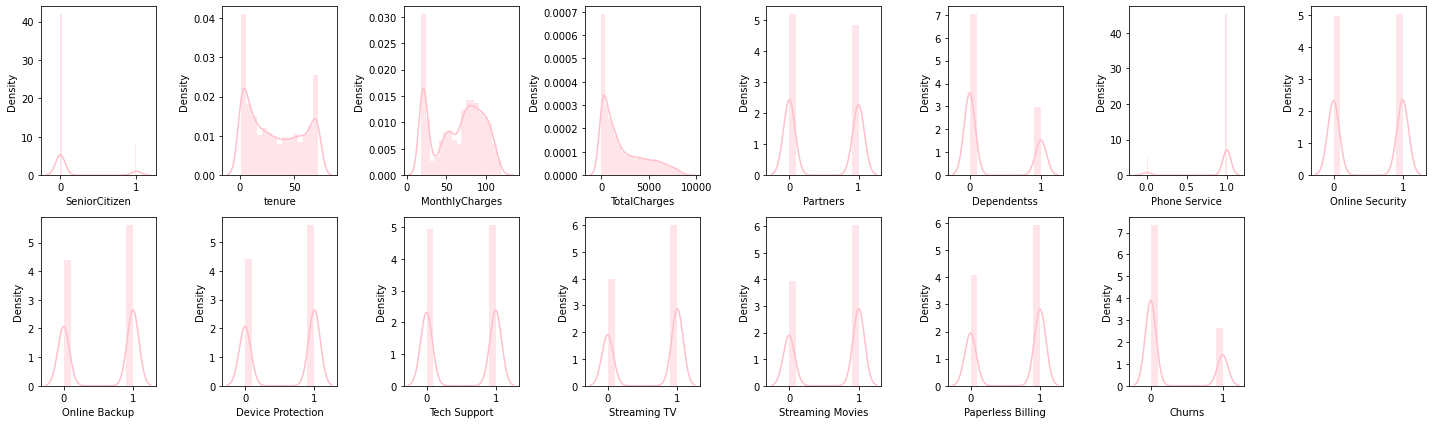

In [ ]:
features = nums
plt.figure(figsize = (20,6))
for i in range (0, len(features)):
  plt.subplot(2, len(features)//2 + 1, i+1)
  sns.distplot(x = df2[features[i]], color = 'pink')
  plt.xlabel(features[i])
  plt.tight_layout()

The visualization above shows us that the distribution of the columns are tend to skew. For 'SeniorCitizen', 'Partners', 'Dependents', and all the columns that the values are just 0 and 1 apparently shows the normal distribution but actually they're not. This can be happen because they just have 2 values (0 and 1) so the distribution is only in values 0 and 1.

In [ ]:
#now we analyze the categorical columns
df2[cats].describe()

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod
count,7032,7032,7032,7032,7032,7032
unique,7032,2,3,3,3,4
top,7590-VHVEG,Male,No,Fiber optic,Month-to-month,Electronic check
freq,1,3549,3385,3096,3875,2365


Observation:
1. There are 7032 customers with different ID
2. Most of the customers are male with no multiple line
3. The most favorite internet service is using fiber optic and is paid monthly (month to month) using electronic check

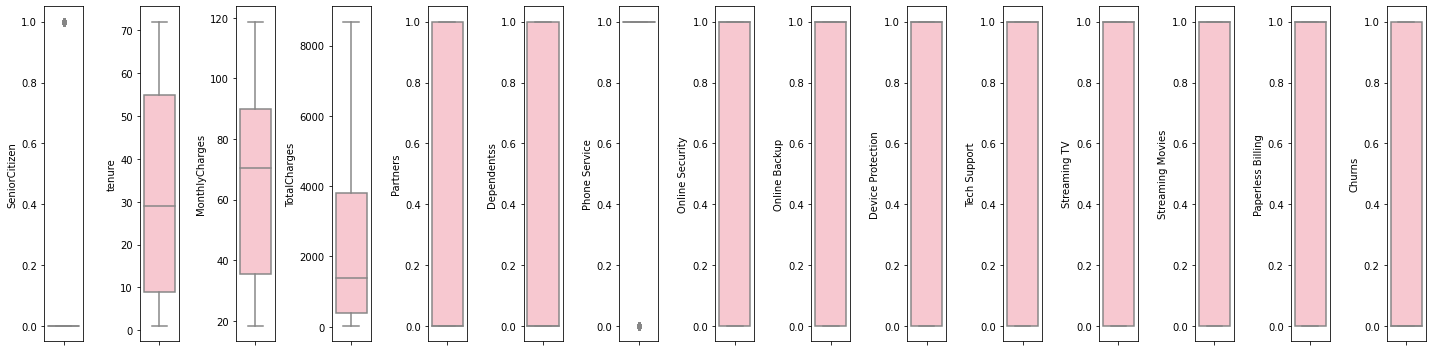

In [ ]:
#the next step we will detect outliers via Boxplot for numerical columns

features = nums
plt.figure(figsize = (20,5))
for i in range (0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y = df2[features[i]], color = 'pink')
  plt.tight_layout()

From the boxplots above, we know most of our columns have no outliers. For SeniorCitizen column we can conclude most of the customers are not senior citizen, which means the customers's age are < 40 years old.
For Phone Service column, we can conclude that most of the customers have phone service

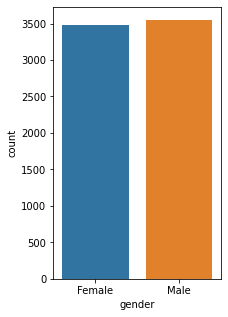

In [ ]:
#now we will make countplots for categorical columns
#we make countplot for all categorical columns, except customerID

#countplot for gender
plt.figure(figsize = (3,5))
sns.countplot(data = df2, x = 'gender')

Total number of female and male customers is not quite different, but still male customers are the most.

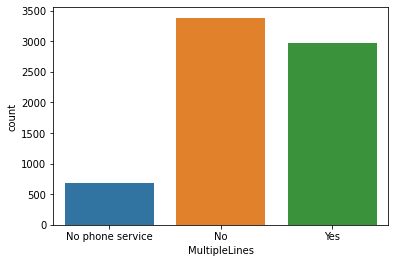

In [ ]:
#count for multiple line
sns.countplot(data = df2, x = 'MultipleLines')

Nowadays, people rarely use multiple lines but some people still use it

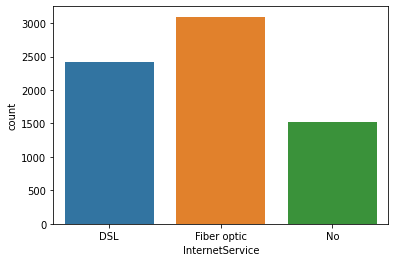

In [ ]:
#countplot for InternetService
sns.countplot(data = df2, x = 'InternetService')

Most of the customers choose fiber optic as their internet service (3000 customers), some of them choose DSL (approximately 2400 customers)

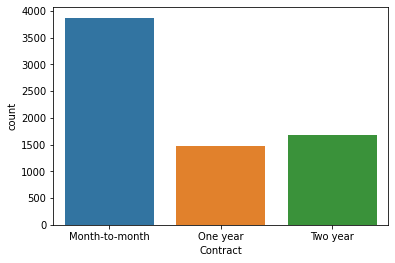

In [ ]:
#countplot for contract
sns.countplot(data = df2, x = 'Contract')

Most of the customers choose to pay monthly (3875 customers) and the rest of customers prefer to choose one year and two years contract

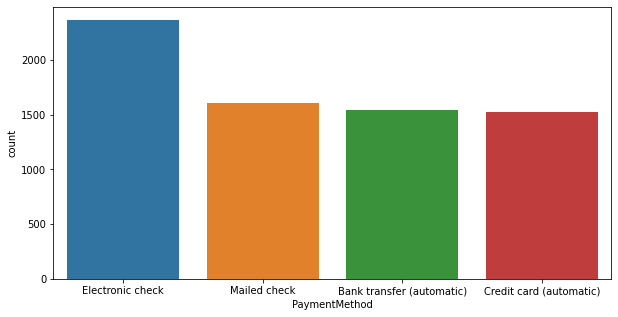

In [ ]:
#countplot for payment method
plt.figure(figsize = (10,5))
sns.countplot(data = df2, x = 'PaymentMethod')

Most of the customers prefer to pay with electronic check (2365 customers) instead of mailed check, bank transfer, and credit card method

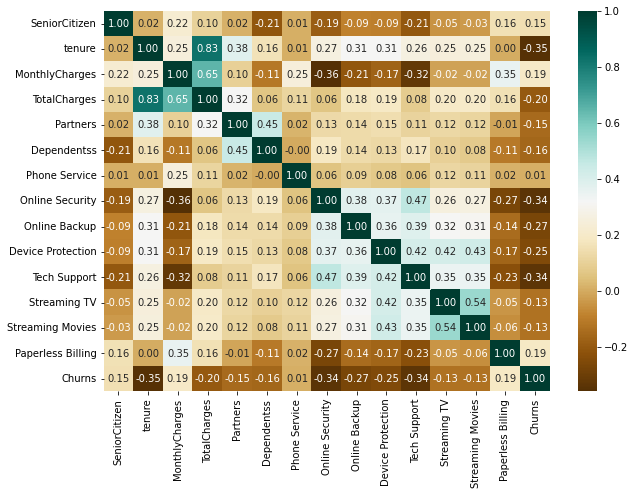

In [ ]:
#now we try to analyze the correlation between all columns with heatmap

correlation = df2.corr()
plt.figure(figsize = (10,7))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'BrBG')

From the heatmap above, we can conclude that:
1. corr 0.8 - 1 = high correlation,
   corr 0.5 - 0.7 = moderate,
   corr 0.0 - 0.4 = low correlation
2. The highest correlation is 0.83 (we can neglect corr = 1)
3. The columns that have highest correlation is TotalCharges and Tenure. It means when someone have a long tenure, he has more total charges. If he is a new customer which his tenure is about 1 or 2 months, the total charges he pays is different with someone with 12 months tenure.
4. The lowest correlation is 0.00 and it is the correlation between Phone Service and Dependants. It means actually there is no correlation between both columns
5. For the negative correlation, it does not mean they have low correlation. The negative sign means the correlation between two columns is negative linear. If the value of a column is high, then the value of the other column is low. For example, Monthlycharges and Online Security have negative correlation and the correlation is quite low (-0.36)
6. Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies columns have low correlation



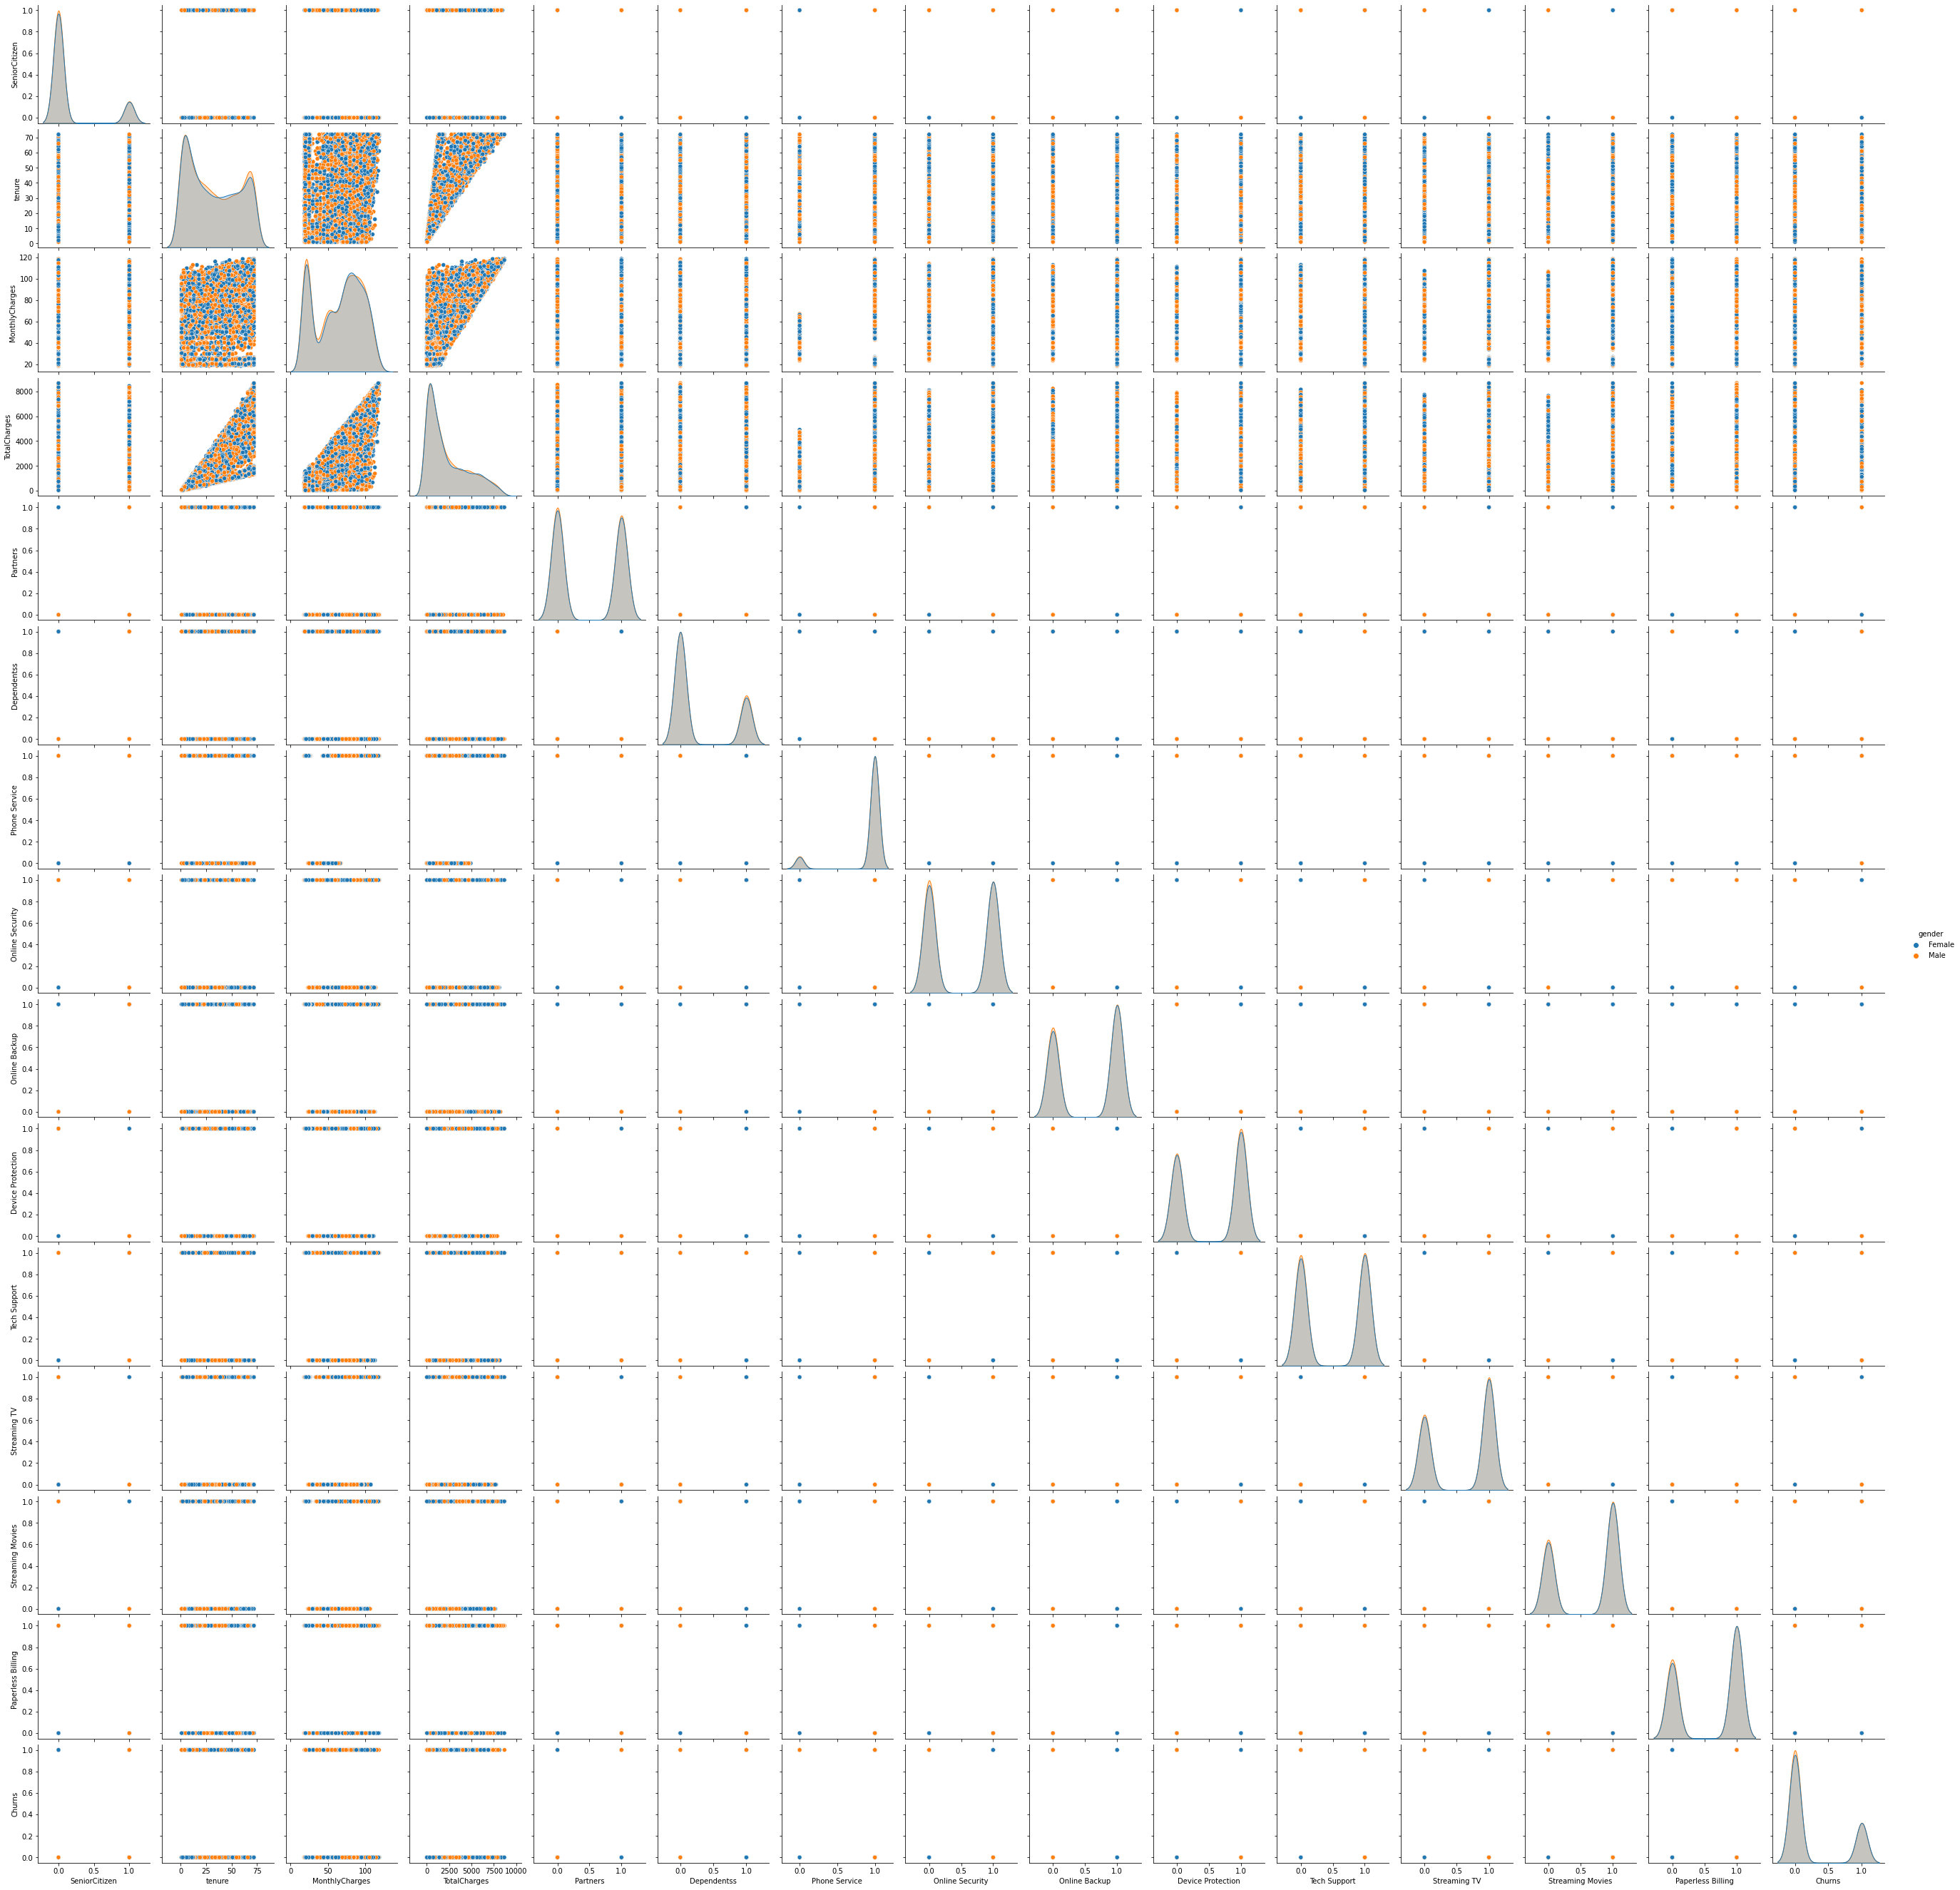

In [ ]:
#we try to analyze the columns with pairplot

sns.pairplot(df2, hue = 'gender')

From the distribution above, we know that there is no significant differences between male and female customers. For example, the SeniorCitizen distribution shows that male customers are more than female customers, with the highest peak is in 0 value, which means most of the customers are not a senior citizen (still young)

From this dataset, I will ask 2 questions and will answer below:
1. Who are the top 10 customers with the most money spend?
2. Which gender has the highest churn rate?

In [ ]:
df2.head()

,customerID,gender,SeniorCitizen,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,...,Dependentss,Phone Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Churns
0,7590-VHVEG,Female,0,1,No phone service,DSL,Month-to-month,Electronic check,29.85,29.85,...,0,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,34,No,DSL,One year,Mailed check,56.95,1889.50,...,0,1,1,0,1,0,0,0,0,0
2,3668-QPYBK,Male,0,2,No,DSL,Month-to-month,Mailed check,53.85,108.15,...,0,1,1,1,0,0,0,0,1,1
3,7795-CFOCW,Male,0,45,No phone service,DSL,One year,Bank transfer (automatic),42.30,1840.75,...,0,0,1,0,1,1,0,0,0,0
4,9237-HQITU,Female,0,2,No,Fiber optic,Month-to-month,Electronic check,70.70,151.65,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
#1

top10 = (df2[['customerID', 'TotalCharges']].sort_values('TotalCharges', ascending = False).head(10))
top10

,customerID,TotalCharges
4610,2889-FPWRM,8684.80
4586,7569-NMZYQ,8672.45
6768,9739-JLPQJ,8670.10
5347,9788-HNGUT,8594.40
2187,8879-XUAHX,8564.75
6118,9924-JPRMC,8547.15
5558,0675-NCDYU,8543.25
2368,6650-BWFRT,8529.50
2603,0164-APGRB,8496.70
2025,1488-PBLJN,8477.70


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

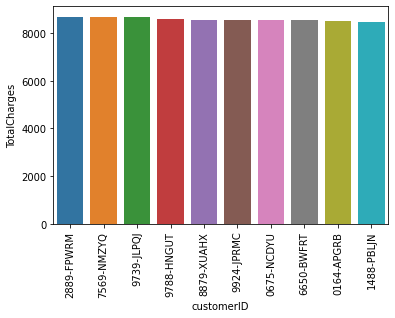

In [ ]:
#we try to visualize it

sns.barplot(data = top10, x = 'customerID', y = 'TotalCharges')
plt.xticks(rotation = 90)

The difference of total charges from each top 10 customers are not too much

In [ ]:
#2

cust_churn = (df2.groupby('gender').agg(total_churns = ('Churns', 'sum')).reset_index())
cust_churn

,gender,total_churns
0,Female,939
1,Male,930


Most of churn customers are female (939) which is just only 9 points more than male customers (930)